## Get all dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Import Data

In [2]:
census = pd.read_csv('../data/Census-Datensatz.csv', sep=';', header=0, encoding='utf-8')
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Prepare the Data

In [ ]:
# Create some dictionaries to map strings to numeric values:

# education can be picked from dataset
map_education_num = census[['education', 'education-num']].drop_duplicates()

#education_dict = map_education_num.to_dict();
education_dict = {}
for index, row in map_education_num.iterrows():
    education_dict[row['education']] = row['education-num']

# race has to be done manually
race_dict = {' Asian-Pac-Islander': 4, ' White': 3, ' Black': 2, ' Amer-Indian-Eskimo':1, ' Other': 0}

# define target, depending on income
target_dict = {' >50K': 100, ' <=50K': 0}

         education  education-num
0        Bachelors             13
2          HS-grad              9
3             11th              7
5          Masters             14
6              9th              5
10    Some-college             10
13      Assoc-acdm             12
14       Assoc-voc             11
15         7th-8th              4
20       Doctorate             16
52     Prof-school             15
56         5th-6th              3
77            10th              6
160        1st-4th              2
224      Preschool              1
415           12th              8


In [4]:
# check for empty values
#census.isnull().sum()
# All fine

# crate a map from education
#print(census["education", "education-num"].unique())

# Remove colums
to_pop = ["workclass", "fnlwgt", "education", "marital-status", "occupation", "relationship", "sex", "capital-gain", "capital-loss", "native-country", "race", "income"]

# convert race to race num
census["race-num"] = census["race"].replace(race_dict)

# define binary target
census["target"] = census["income"].replace(target_dict)


for col in to_pop:
    census.pop(col)

census.head(100)

,age,education-num,hours-per-week,race-num,target
0,39,13,40,3,0
1,50,13,13,3,0
2,38,9,40,3,0
3,53,7,40,2,0
4,28,13,40,2,0
...,...,...,...,...,...
95,29,10,50,3,0
96,48,16,60,3,100
97,37,10,48,3,100
98,48,12,40,3,0


## Create a linear regression

### Gradient

In [5]:
# Medium Sum Error
def mse(y_pred,y):
    return (y_pred-y)**2

# Sum Square Error
def sse(y_pred, y):
    return np.sum((y_pred-y)**2)


# Initialgewicht
w_age = 1
w_education = 1
w_hours = 1
# Initialbias
b = -30
# Anzahl der Epochen:
epochs = 10000
# Learning rate:
lr_w_age = 0.000000001
lr_w_education = 0.000000001
lr_w_hours = 0.000000001
lr_b = 0.00001

#Für Plots speichern wir alle "zwischendrin" Fehler und Gewichte
b_history, w_age_history, w_education_history, w_hours_history, error_history = [],[],[],[],[]

# Vergesses Sie nicht, den Fehler bei jeder Iteration für die Visualisierung zu speichern.
for x in range(epochs):

  predicted = (w_age * census['age']) + (w_education * census['education-num'])  + (w_hours * census['hours-per-week']) + b
  error = sse(predicted, census['target'])

  gradient_w_age = 2 * np.dot(census['age'], predicted - census['target'])
  gradient_w_education = 2 * np.dot(census['education-num'], predicted - census['target'])
  gradient_w_hours = 2 * np.dot(census['hours-per-week'], predicted - census['target'])
  gradient_b = 2 * np.sum(predicted - census['target'])

  w_age = w_age - lr_w_age * gradient_w_age
  w_education = w_education - lr_w_education * gradient_w_education
  w_hours = w_hours - lr_w_hours * gradient_w_hours
  b = b - lr_b * gradient_b

  w_age_history.append(w_age)
  w_education_history.append(w_education)
  w_hours_history.append(w_hours)
  b_history.append(b)
  error_history.append(error)

  #print("Ergebnis: w_age: {} b:{}" . format(w_age,b))


print("Ergebnis:\n w_age: {}\n w_education: {}\n w_hours: {}\n b:{}\n error: {}" . format(w_age, w_education, w_hours, b, error))

Ergebnis:
 w_age: 0.662546574876406
 w_education: 4.960495944130737
 w_hours: 0.5919622216529759
 b:-75.4234514200458
 error: 48226368.706119135


### visualize

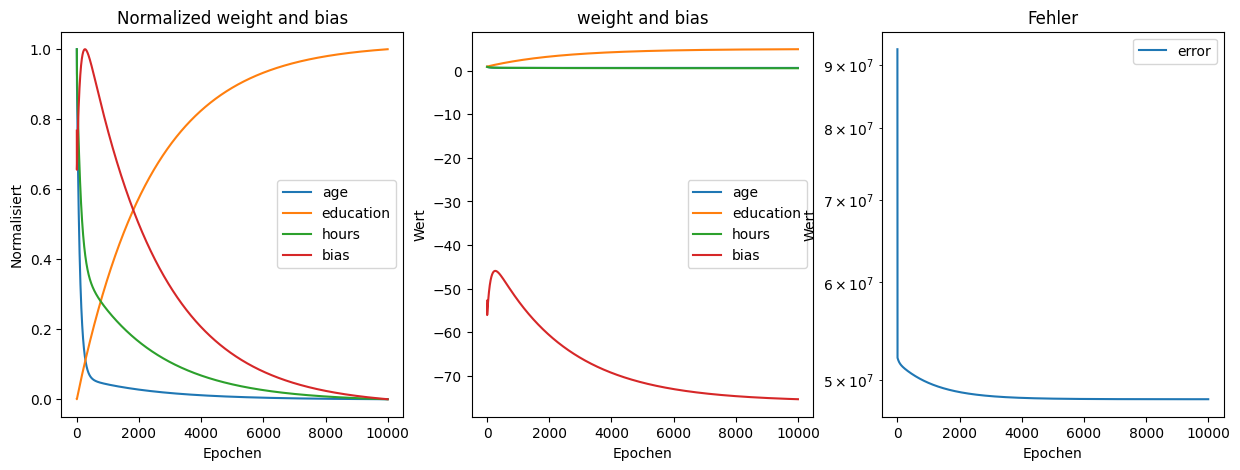

In [6]:
w_age_np = np.array(w_age_history)
w_age_np = w_age_np.reshape(-1,1)
w_age_norm = MinMaxScaler().fit_transform(w_age_np)

w_education_np = np.array(w_education_history)
w_education_np = w_education_np.reshape(-1,1)
w_education_norm = MinMaxScaler().fit_transform(w_education_np)

w_hours_np = np.array(w_hours_history)
w_hours_np = w_hours_np.reshape(-1,1)
w_hours_norm = MinMaxScaler().fit_transform(w_hours_np)

b_np = np.array(b_history)
b_np = b_np.reshape(-1,1)
b_norm = MinMaxScaler().fit_transform(b_np)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(range(epochs), w_age_norm, label="age")
ax.plot(range(epochs), w_education_norm, label="education")
ax.plot(range(epochs), w_hours_norm, label="hours")
ax.plot(range(epochs), b_norm, label="bias")
ax.set_title("Normalized weight and bias")
ax.set_xlabel("Epochen")
ax.set_ylabel("Normalisiert")
ax.legend()

ax = fig.add_subplot(132)
ax.plot(range(epochs), w_age_history, label="age")
ax.plot(range(epochs), w_education_history, label="education")
ax.plot(range(epochs), w_hours_history, label="hours")
ax.plot(range(epochs), b_history, label="bias")
ax.set_title("weight and bias")
ax.set_xlabel("Epochen")
ax.set_ylabel("Wert")
ax.legend()

ax = fig.add_subplot(133)
ax.plot(range(epochs), error_history, label="error")
ax.set_yscale('log')
ax.set_title("Fehler")
ax.set_xlabel("Epochen")
ax.set_ylabel("Wert")
ax.legend()

### predict every column

In [ ]:
def resolveEducation(education_num):
    for key, value in education_dict.items():
        if value == education_num:
            return key
w_age= 0.662546574876406
w_education= 4.960495944130737
w_hours= 0.5919622216529759
b=-75.4234514200458

#for index, row in census.iterrows():
    #age	education-num	hours-per-week	race-num	target

    #predicted = (w_age * row['age']) + (w_education * row['education-num'])  + (w_hours * row['hours-per-week']) + b

    #print("Age:{} | Education: {} | Hours: {} | Target: {} | Predicted: {} " . format(row['age'], resolveEducation(row['education-num']), row['hours-per-week'], row['target'], predicted))


census['score'] = (w_age * census['age']) + (w_education * census['education-num'])  + (w_hours * census['hours-per-week']) + b
census.head(20)


rounded = []
more = []
less = []
for index, row in census.iterrows():
    score = row['score']
    rounded.append(round(score/10)*10)
    more.append(1 if row['target'] == 100 else 0)
    less.append(0 if row['target'] == 100 else 1)

cluster = {
    'rounded':rounded,
    'more':more,
    'less': less,
}

# Create DataFrame
cluster = pd.DataFrame(cluster)

cluster.head(20)
cluster_unique = cluster.groupby('rounded', as_index=False).agg({
    'more': 'sum',
    'less': 'sum'
})

#cluster_unique.head(20)



,rounded,more,less
0,-50,0,2
1,-40,0,10
2,-30,0,151
3,-20,3,614
4,-10,18,1153
5,0,56,2456
6,10,310,5230
7,20,1120,5787
8,30,1840,5143
9,40,1889,2553


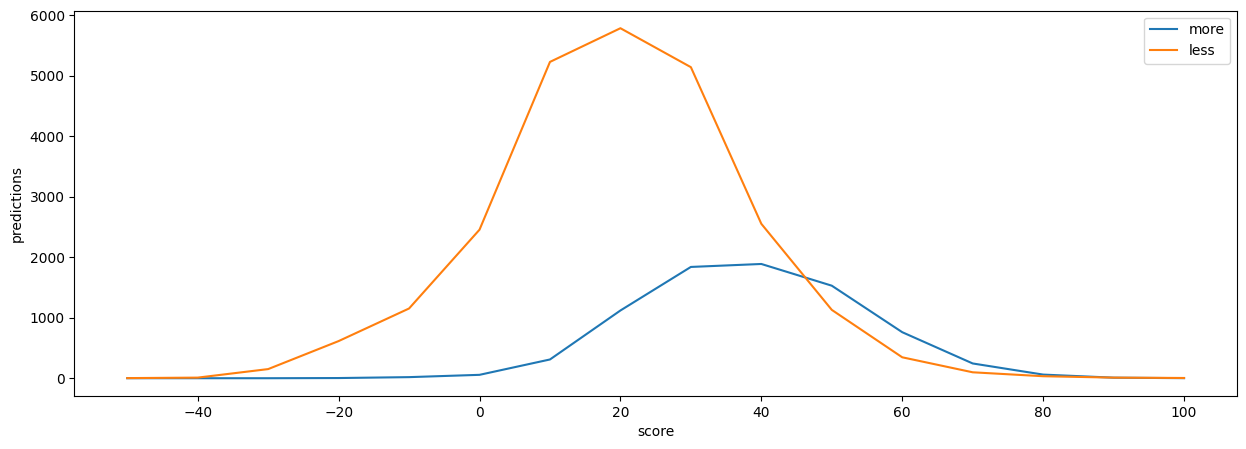

In [31]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(cluster_unique['rounded'], cluster_unique['more'], label="more")
ax.plot(cluster_unique['rounded'], cluster_unique['less'], label="less")

ax.set_xlabel("score")
ax.set_ylabel("predictions")
ax.legend()